<a href="https://colab.research.google.com/github/Jakelinecs/Tareas-Machine-Learning/blob/main/N10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', 10)

In [28]:
iris = load_iris()

feature_names = iris.feature_names

X = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

y = pd.DataFrame(iris.target, columns=['Species'])

print("--- 説明変数 X (DataFrame) ---")
print(X.head())
print("\n--- 目的変数 y (DataFrame) ---")
print(y.head())

df = pd.concat([X, y], axis=1)

print("\n--- 結合された DataFrame df ---")
print(df.head())
print(f"dfの形状: {df.shape}")

--- 説明変数 X (DataFrame) ---
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

--- 目的変数 y (DataFrame) ---
   Species
0        0
1        0
2        0
3        0
4        0

--- 結合された DataFrame df ---
   sepal_length  sepal_width  petal_length  petal_width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
dfの形状: (150, 5)


In [3]:
print("\n--- データの先頭4サンプル ---")
print(df.head(4))


--- データの先頭4サンプル ---
   sepal_length  sepal_width  petal_length  petal_width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0


In [4]:
print("\n--- 目的変数 (Species) ごとのサンプル数 ---")
print(df['Species'].value_counts())


--- 目的変数 (Species) ごとのサンプル数 ---
Species
0    50
1    50
2    50
Name: count, dtype: int64


In [5]:
print("\n--- 欠損値の有無 (特徴量ごとの合計) ---")
print(df.isnull().sum())


--- 欠損値の有無 (特徴量ごとの合計) ---
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64


In [29]:
print("\n--- データの基本統計量 (describe) ---")
print(df.describe())


--- データの基本統計量 (describe) ---
       sepal_length  sepal_width  petal_length  petal_width     Species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


In [30]:
print("\n--- sepal_widthの抽出 ---")
sepal_width_series = df['sepal_width']
sepal_width_df = df[['sepal_width']]
print(f"方法1 (Series, 最初の5行):\n{sepal_width_series.head()}")
print(f"方法2 (DataFrame, 最初の5行):\n{sepal_width_df.head()}")


--- sepal_widthの抽出 ---
方法1 (Series, 最初の5行):
0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64
方法2 (DataFrame, 最初の5行):
   sepal_width
0          3.5
1          3.0
2          3.2
3          3.1
4          3.6


In [31]:
print("\n--- 50番目から99番目までのデータ抽出 (iloc) ---")
data_50_to_99 = df.iloc[50:100, :]
print(f"形状: {data_50_to_99.shape}")
print(data_50_to_99.head())


--- 50番目から99番目までのデータ抽出 (iloc) ---
形状: (50, 5)
    sepal_length  sepal_width  petal_length  petal_width  Species
50           7.0          3.2           4.7          1.4        1
51           6.4          3.2           4.5          1.5        1
52           6.9          3.1           4.9          1.5        1
53           5.5          2.3           4.0          1.3        1
54           6.5          2.8           4.6          1.5        1


In [32]:
print("\n--- petal_lengthの50番目から99番目までのデータ抽出 (iloc) ---")
petal_length_50_to_99 = df.iloc[50:100, 2]
print(f"形状: {petal_length_50_to_99.shape}")
print(petal_length_50_to_99.head())


--- petal_lengthの50番目から99番目までのデータ抽出 (iloc) ---
形状: (50,)
50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
Name: petal_length, dtype: float64


In [33]:
print("\n--- petal_widthが0.2のデータの抽出 ---")
data_pw_02 = df.loc[df['petal_width'] == 0.2]
print(f"形状: {data_pw_02.shape}")
print(data_pw_02.head())


--- petal_widthが0.2のデータの抽出 ---
形状: (29, 5)
   sepal_length  sepal_width  petal_length  petal_width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30446 (\N{CJK UNIFIED IDEOGRAPH-76EE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22793 (\N{CJK UNIFIED IDEOGRAPH-5909}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12372 (\N{HIRAGANA LETTER GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

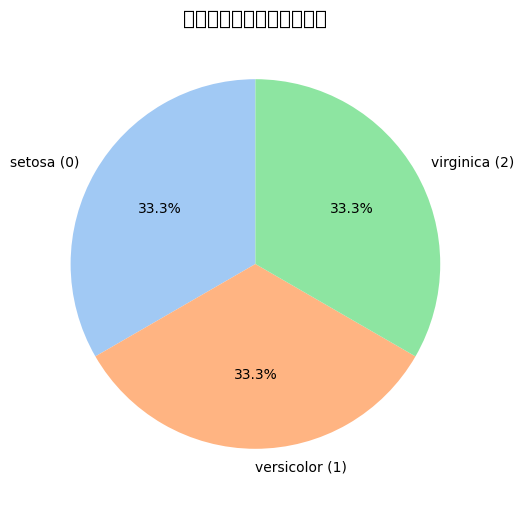

In [34]:
plt.figure(figsize=(6, 6))
species_counts = df['Species'].value_counts()
labels = [f'{iris.target_names[i]} ({i})' for i in species_counts.index]

plt.pie(
    species_counts,
    labels=labels,
    autopct='%1.1f%%', # パーセンテージ表示
    startangle=90,
    colors=sns.color_palette('pastel')
)
plt.title('目的変数ごとのサンプル数')
plt.show()

/tmp/ipython-input-1525514334.py:23: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95]) # サブプロットタイトルと凡例が重ならないように調整
/tmp/ipython-input-1525514334.py:23: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95]) # サブプロットタイトルと凡例が重ならないように調整
/tmp/ipython-input-1525514334.py:23: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95]) # サブプロットタイトルと凡例が重ならないように調整
/tmp/ipython-input-1525514334.py:23: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95]) # サブプロットタイトルと凡例が重ならないように調整
/tmp/ipython-input-1525514334.py:23: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95]) # サブプロットタイトルと凡例が重ならないように調整
/tmp/ipython-input-1525

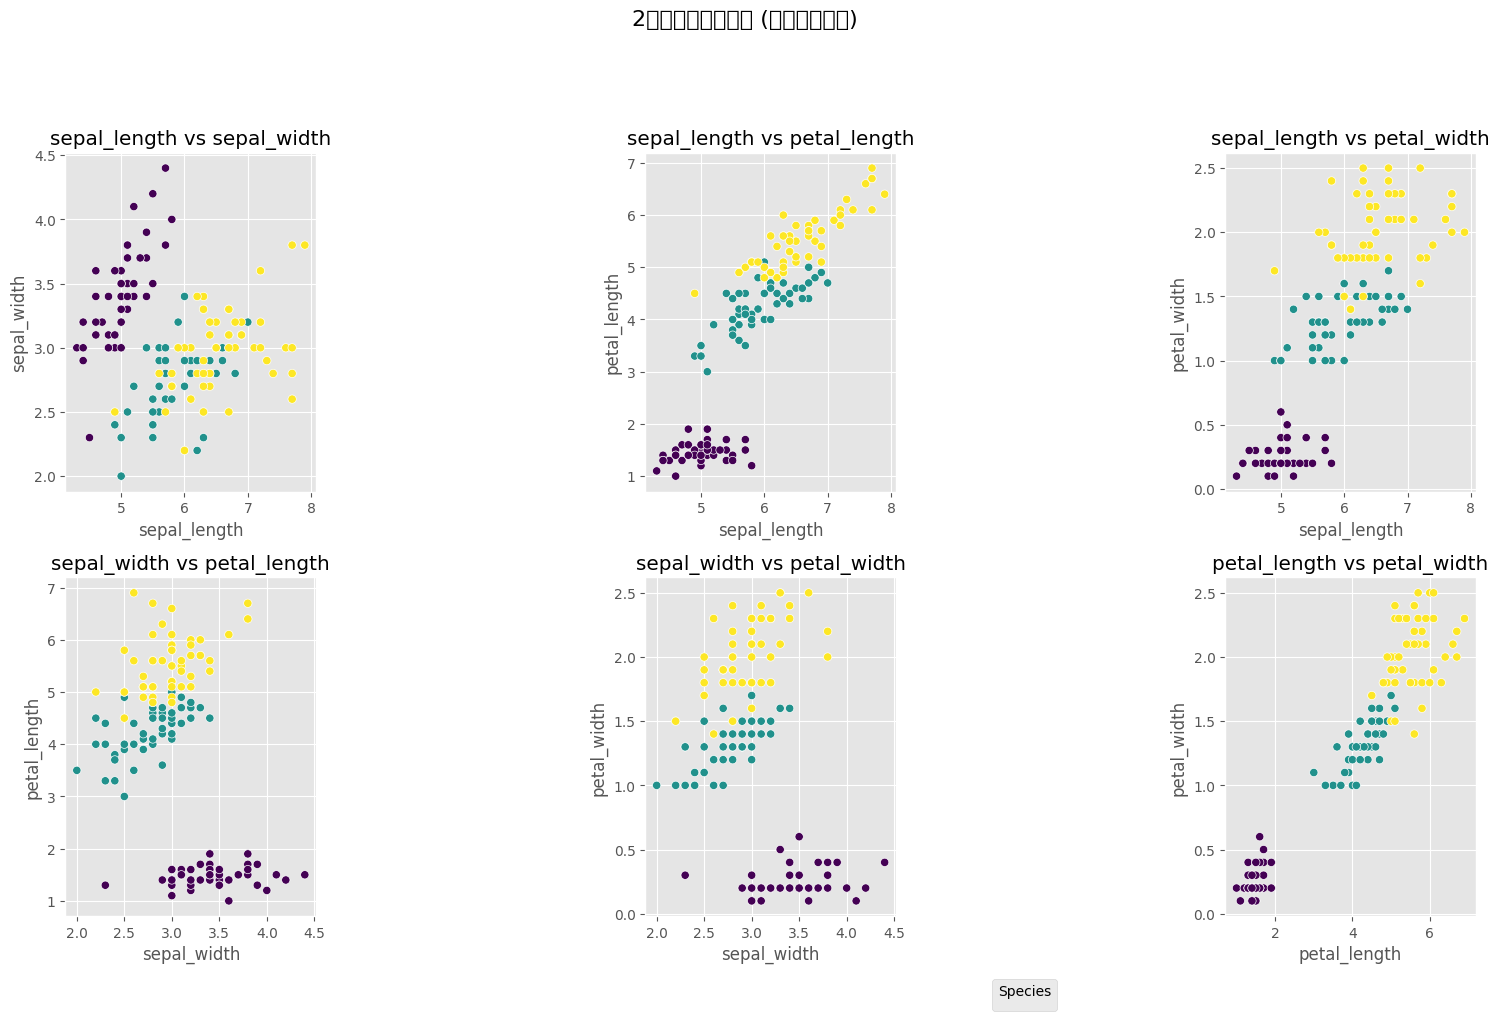

In [37]:
combinations = [
    ('sepal_length', 'sepal_width'),
    ('sepal_length', 'petal_length'),
    ('sepal_length', 'petal_width'),
    ('sepal_width', 'petal_length'),
    ('sepal_width', 'petal_width'),
    ('petal_length', 'petal_width')
]

plt.figure(figsize=(15, 10))
plt.suptitle('2特徴量間の散布図 (種類別色分け)', y=1.02, fontsize=16)

for i, (x_col, y_col) in enumerate(combinations):
    plt.subplot(2, 3, i + 1)
    # 目的変数 (Species) ごとに色分けしてプロット
    sns.scatterplot(x=x_col, y=y_col, hue='Species', data=df, palette='viridis', legend=False)
    plt.title(f'{x_col} vs {y_col}')

# 凡例を中央に配置
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, iris.target_names, title='Species', loc='lower center', bbox_to_anchor=(-0.8, -0.3), ncol=3)

plt.tight_layout(rect=[0, 0, 1, 0.95]) # サブプロットタイトルと凡例が重ならないように調整
plt.show()


--- 散布図行列 (Pair Plot) ---


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25955 (\N{CJK UNIFIED IDEOGRAPH-6563}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22259 (\N{CJK UNIFIED IDEOGRAPH-56F3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from font(s) DejaVu Sans.
  fig.canvas

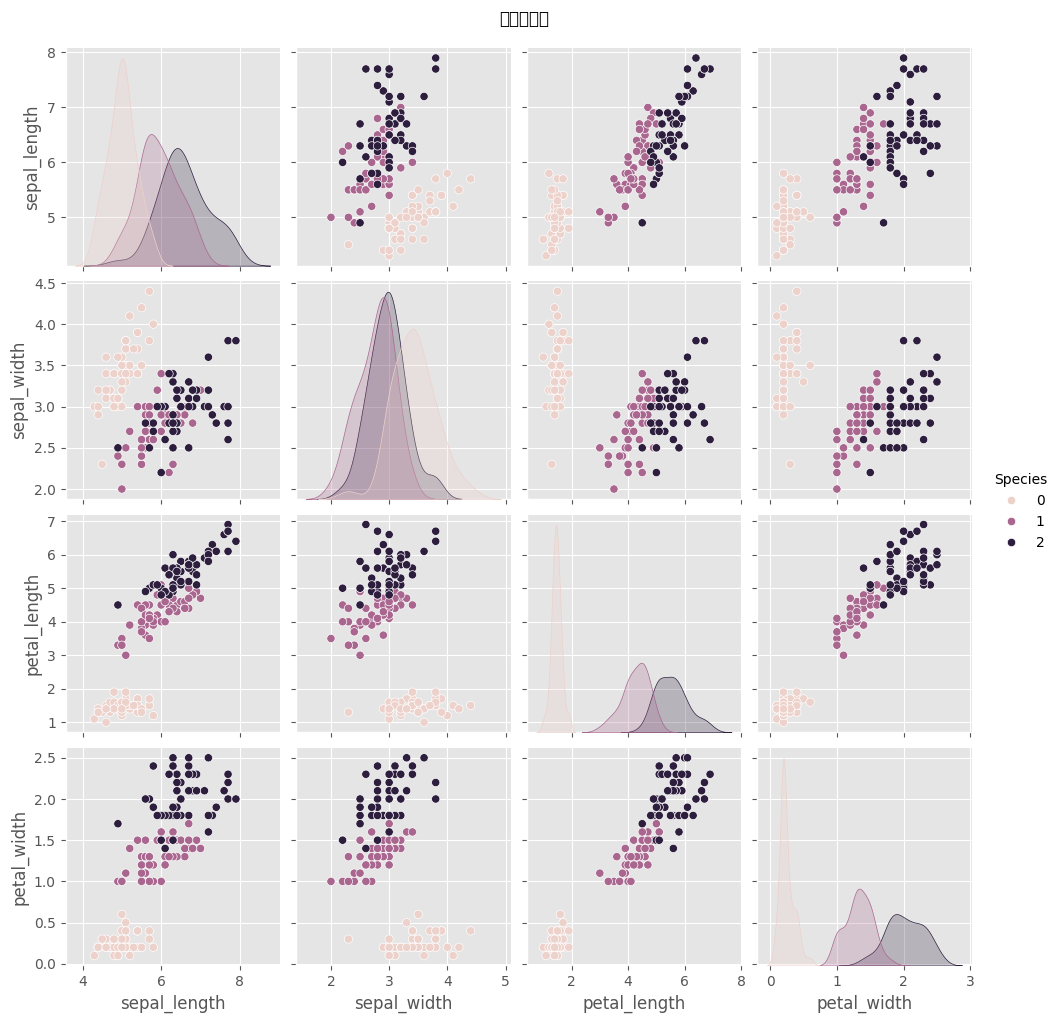

In [14]:
print("\n--- 散布図行列 (Pair Plot) ---")
# hue='Species' で種類ごとに色分け
sns.pairplot(df, hue='Species', diag_kind='kde')
plt.suptitle('散布図行列', y=1.02)
plt.show()

In [15]:
# corr()メソッドで相関係数行列を計算
correlation_matrix = X.corr()

print("\n--- 相関係数行列 (Correlation Matrix) ---")
print(correlation_matrix)


--- 相関係数行列 (Correlation Matrix) ---
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38306 (\N{CJK UNIFIED IDEOGRAPH-95A2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20418 (\N{CJK UNIFIED IDEOGRAPH-4FC2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12498 (\N{KATAKANA LETTER HI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

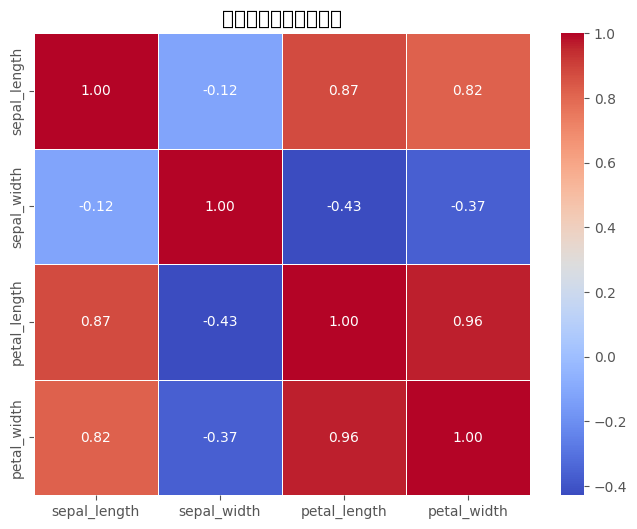

In [16]:
plt.figure(figsize=(8, 6))
# annot=Trueで数値も表示、cmapでカラーマップを指定
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('相関係数ヒートマップ')
plt.show()